## Project Overview

This project was done as apart of the DSC-140S course at the University of Mount Union in the fall of 2024. This was completed to show proficiency in using the pymysql library in python.

If there are any questions. my contact info is in the README.md

In [3]:
#Library Imports

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




In [ ]:
#Connecting to the server

connection = pymysql.connect(
host = "dsc140.cmgtlybtlnmh.us-east-2.rds.amazonaws.com",
user = "guest",
password = "UMUdsc140",
db="autos")
conn = connection.cursor()

In [ ]:
#Looking at all the tables in the server

sql_command = "SHOW TABLES" 
output = conn.execute(sql_command) 
table_names = conn.fetchall() 

for name in table_names:
    print(name)

('mpg',)


In [ ]:
#Retrieving the column names from the table "mpg"

sql_command = "SHOW COLUMNS FROM mpg"
output = conn.execute(sql_command)
columns = conn.fetchall()

col_names =[]
for col in columns:
    col_names.append(col[0])

col_names = [col[0] for col in columns]

print(col_names)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


In [ ]:
#Getting an overview of what type of data in in the dataframe alongside turning it into a df

sql_mpg_names = "SHOW COLUMNS FROM mpg"
output = conn.execute(sql_mpg_names)
columns = conn.fetchall()
mpg_col_names = [col[0] for col in columns]

sql_mpg_data = "SELECT * FROM mpg"
output = conn.execute(sql_mpg_data)
mpg_data = conn.fetchall()

mpg_data_df = pd.DataFrame (mpg_data, columns=mpg_col_names)
mpg_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           392 non-null    int64 
 1   cylinders     392 non-null    int64 
 2   displacement  392 non-null    int64 
 3   horsepower    392 non-null    int64 
 4   weight        392 non-null    int64 
 5   acceleration  392 non-null    object
 6   model year    392 non-null    int64 
 7   origin        392 non-null    int64 
 8   car name      392 non-null    object
dtypes: int64(7), object(2)
memory usage: 27.7+ KB


In [8]:
print(mpg_data_df)

     mpg  cylinders  displacement  horsepower  weight acceleration  \
0     18          8           307         130    3504           12   
1     15          8           350         165    3693         11.5   
2     18          8           318         150    3436           11   
3     16          8           304         150    3433           12   
4     17          8           302         140    3449         10.5   
..   ...        ...           ...         ...     ...          ...   
387   27          4           140          86    2790         15.6   
388   44          4            97          52    2130         24.6   
389   32          4           135          84    2295         11.6   
390   28          4           120          79    2625         18.6   
391   31          4           119          82    2720         19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  


LinregressResult(slope=1.2339125952935914, intercept=-70.25982841383757, rvalue=0.5827504038193871, pvalue=5.025138767908598e-37, stderr=0.08713119887636653, intercept_stderr=6.627949327125168)
The correlation score is 0.5827504038193854


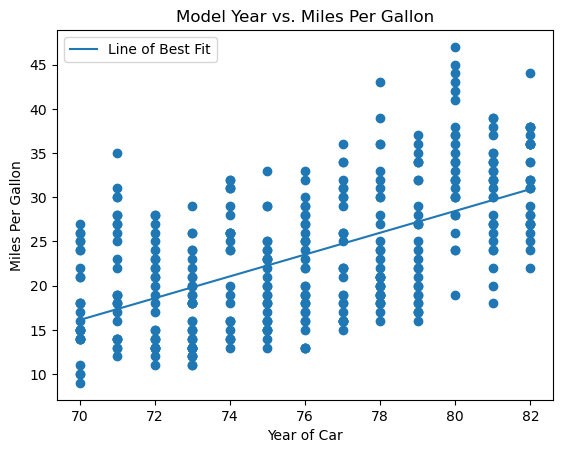

In [ ]:
#Performed linear regression on model year and mpg alongside plotting the line of best fit & graphing the data as a scatter plot
#Also performed pearson correation score on it
#This was done for each data sets asked for in the assignment


model_year = mpg_data_df["model year"]
mpg = mpg_data_df["mpg"]

linear_model = scipy.stats.linregress(model_year,mpg)
print (linear_model)
slope = linear_model.slope
y_intercept = linear_model.intercept

linear_fit = slope*model_year+y_intercept

plt.scatter(model_year, mpg)
plt.plot(model_year,linear_fit, label="Line of Best Fit")
plt.legend()
plt.title("Model Year vs. Miles Per Gallon")
plt.xlabel("Year of Car")
plt.ylabel("Miles Per Gallon")

corr = scipy.stats.pearsonr(model_year, mpg)
print ("The correlation score is", corr[0])


LinregressResult(slope=-0.007635851710299705, intercept=46.228738220239926, rvalue=-0.8315352698216343, pvalue=1.2705440105790869e-101, stderr=0.0002582894372304098, intercept_stderr=0.7996822743965853)
The correlation score is -0.8315352698216334


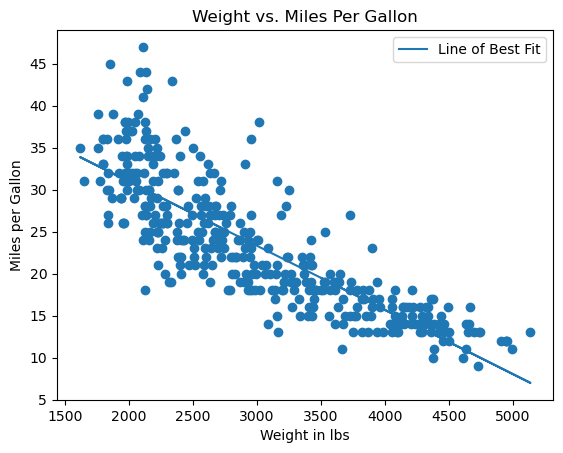

In [10]:
weight = mpg_data_df["weight"]

linear_model = scipy.stats.linregress(weight,mpg)
print (linear_model)
slope = linear_model.slope
y_intercept = linear_model.intercept

linear_fit = slope*weight+y_intercept

plt.scatter(weight, mpg)
plt.plot(weight,linear_fit, label="Line of Best Fit")
plt.legend()
plt.title("Weight vs. Miles Per Gallon")
plt.xlabel("Weight in lbs")
plt.ylabel("Miles per Gallon")

corr = scipy.stats.pearsonr(weight, mpg)
print ("The correlation score is", corr[0])


LinregressResult(slope=-0.0013406083933927909, intercept=79.97136618540097, rvalue=-0.3091198808308162, pvalue=3.9865175024586584e-10, stderr=0.00020884964925175885, intercept_stderr=0.6466132115638535)
The correlation score is -0.30911988083081543


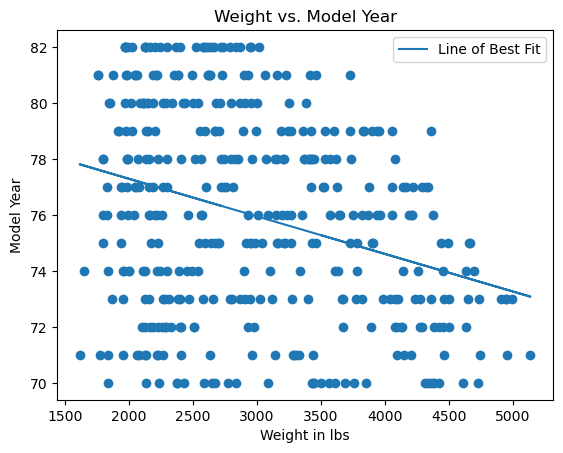

In [11]:
linear_model = scipy.stats.linregress(weight,model_year)
print (linear_model)
slope = linear_model.slope
y_intercept = linear_model.intercept

linear_fit = slope*weight+y_intercept

plt.scatter(weight, model_year)
plt.plot(weight,linear_fit, label="Line of Best Fit")
plt.legend()
plt.title("Weight vs. Model Year")
plt.xlabel("Weight in lbs")
plt.ylabel("Model Year")

corr = scipy.stats.pearsonr(weight, model_year)
print ("The correlation score is", corr[0])


In [12]:
origin = mpg_data_df["origin"]
print(origin)

0      1
1      1
2      1
3      1
4      1
      ..
387    1
388    2
389    1
390    1
391    1
Name: origin, Length: 392, dtype: int64


Text(0, 0.5, 'Miles Per Gallon')

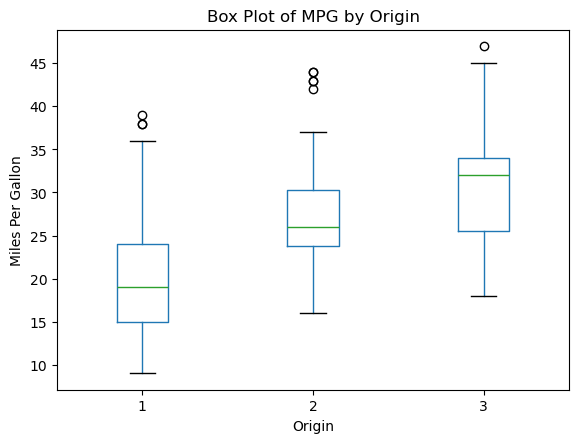

In [ ]:
#Created a boxplot of mpg and plotted my each by origin 

mpg_data_df.boxplot(column="mpg", by="origin", grid=False)
plt.suptitle("")
plt.title("Box Plot of MPG by Origin")
plt.xlabel("Origin")
plt.ylabel("Miles Per Gallon")


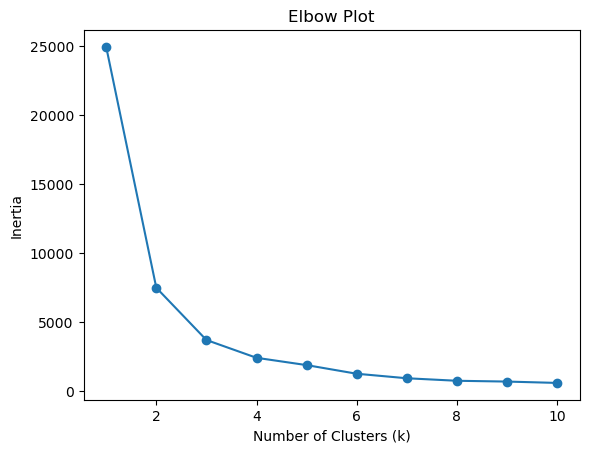

In [ ]:
#Created an elbow plot to figure out the optimal amount of clusters for machine learning

#scaler = StandardScaler()
#X_prime = scaler.fit_transform(mpg_data_df)

X = mpg_data_df[["cylinders", "mpg"]]

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#Optimal Clusters would be 3 clusters


In [ ]:
#Put the optimal number of clusters into a K-Means function to get a prediction

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 2 2 0 0 0 0 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 2 1
 1 2 2 1 1 2 2 2 1 1 2 1 1 1 1 1 0 2 0 2 1 1 1 1 1 1 1 1 2 2 2 0 0 2 2 2 2
 2 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 2 2 2 1 2 1 2 2 2 2 0 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 0 1 1 1 1 0 0 2 2 2 1 1 1 1 1 1 1 1 0 0 0 2 0 1 1 1
 1 1 2 1 1 1 1 1 1 2 2 2 2 0 0 0 0 2 2 2 0 0 0 0 0 1 1 1 1 2 1 2 2 1 2 2 1
 1 1 1 1 1 0 2 2 0 2 2 2 2 1 1 2 1 0 0 2 1 2 1 2 1 1 1 1 1 1 1 1 0 0 0 2 2
 2 2 2 0 0 0 0 2 2 2 0 0 0 0 0 2 2 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0
 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 1 1 2 2 0 0 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 2 2 0 0 2 0]


In [ ]:
#Modeling how accurate our prediction was based on 3 clusters

X = mpg_data_df[["cylinders", "mpg"]]
y = clusters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

prediction = classifier.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(accuracy*100)

#Usually the accuracy 90-100%

100.0
